# ML Facial recognition to detect mood and suggest songs accordingly


**Dataset:https://www.kaggle.com/datasets/msambare/fer2013**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.layers import Flatten, Dense, LSTM, Dropout, Embedding, Activation
import os
import pathlib
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
main_accent_colour = "#b366ff"
dim_colour="darkgrey"
main_palette = ["#FBE5C0", "#DD9A30", "#F88379", "#FF6FC2", "purple", "#D086F6", "#B0D2C2", "#4C5D70", "#6FA2CE", "#382D24", "#3ACF3A", "#7D7D00"]
vals = ["disgust"]

In [2]:
print("TensorFlow version :", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow version : 2.11.0
Num GPUs Available:  0


**Data Visualization**

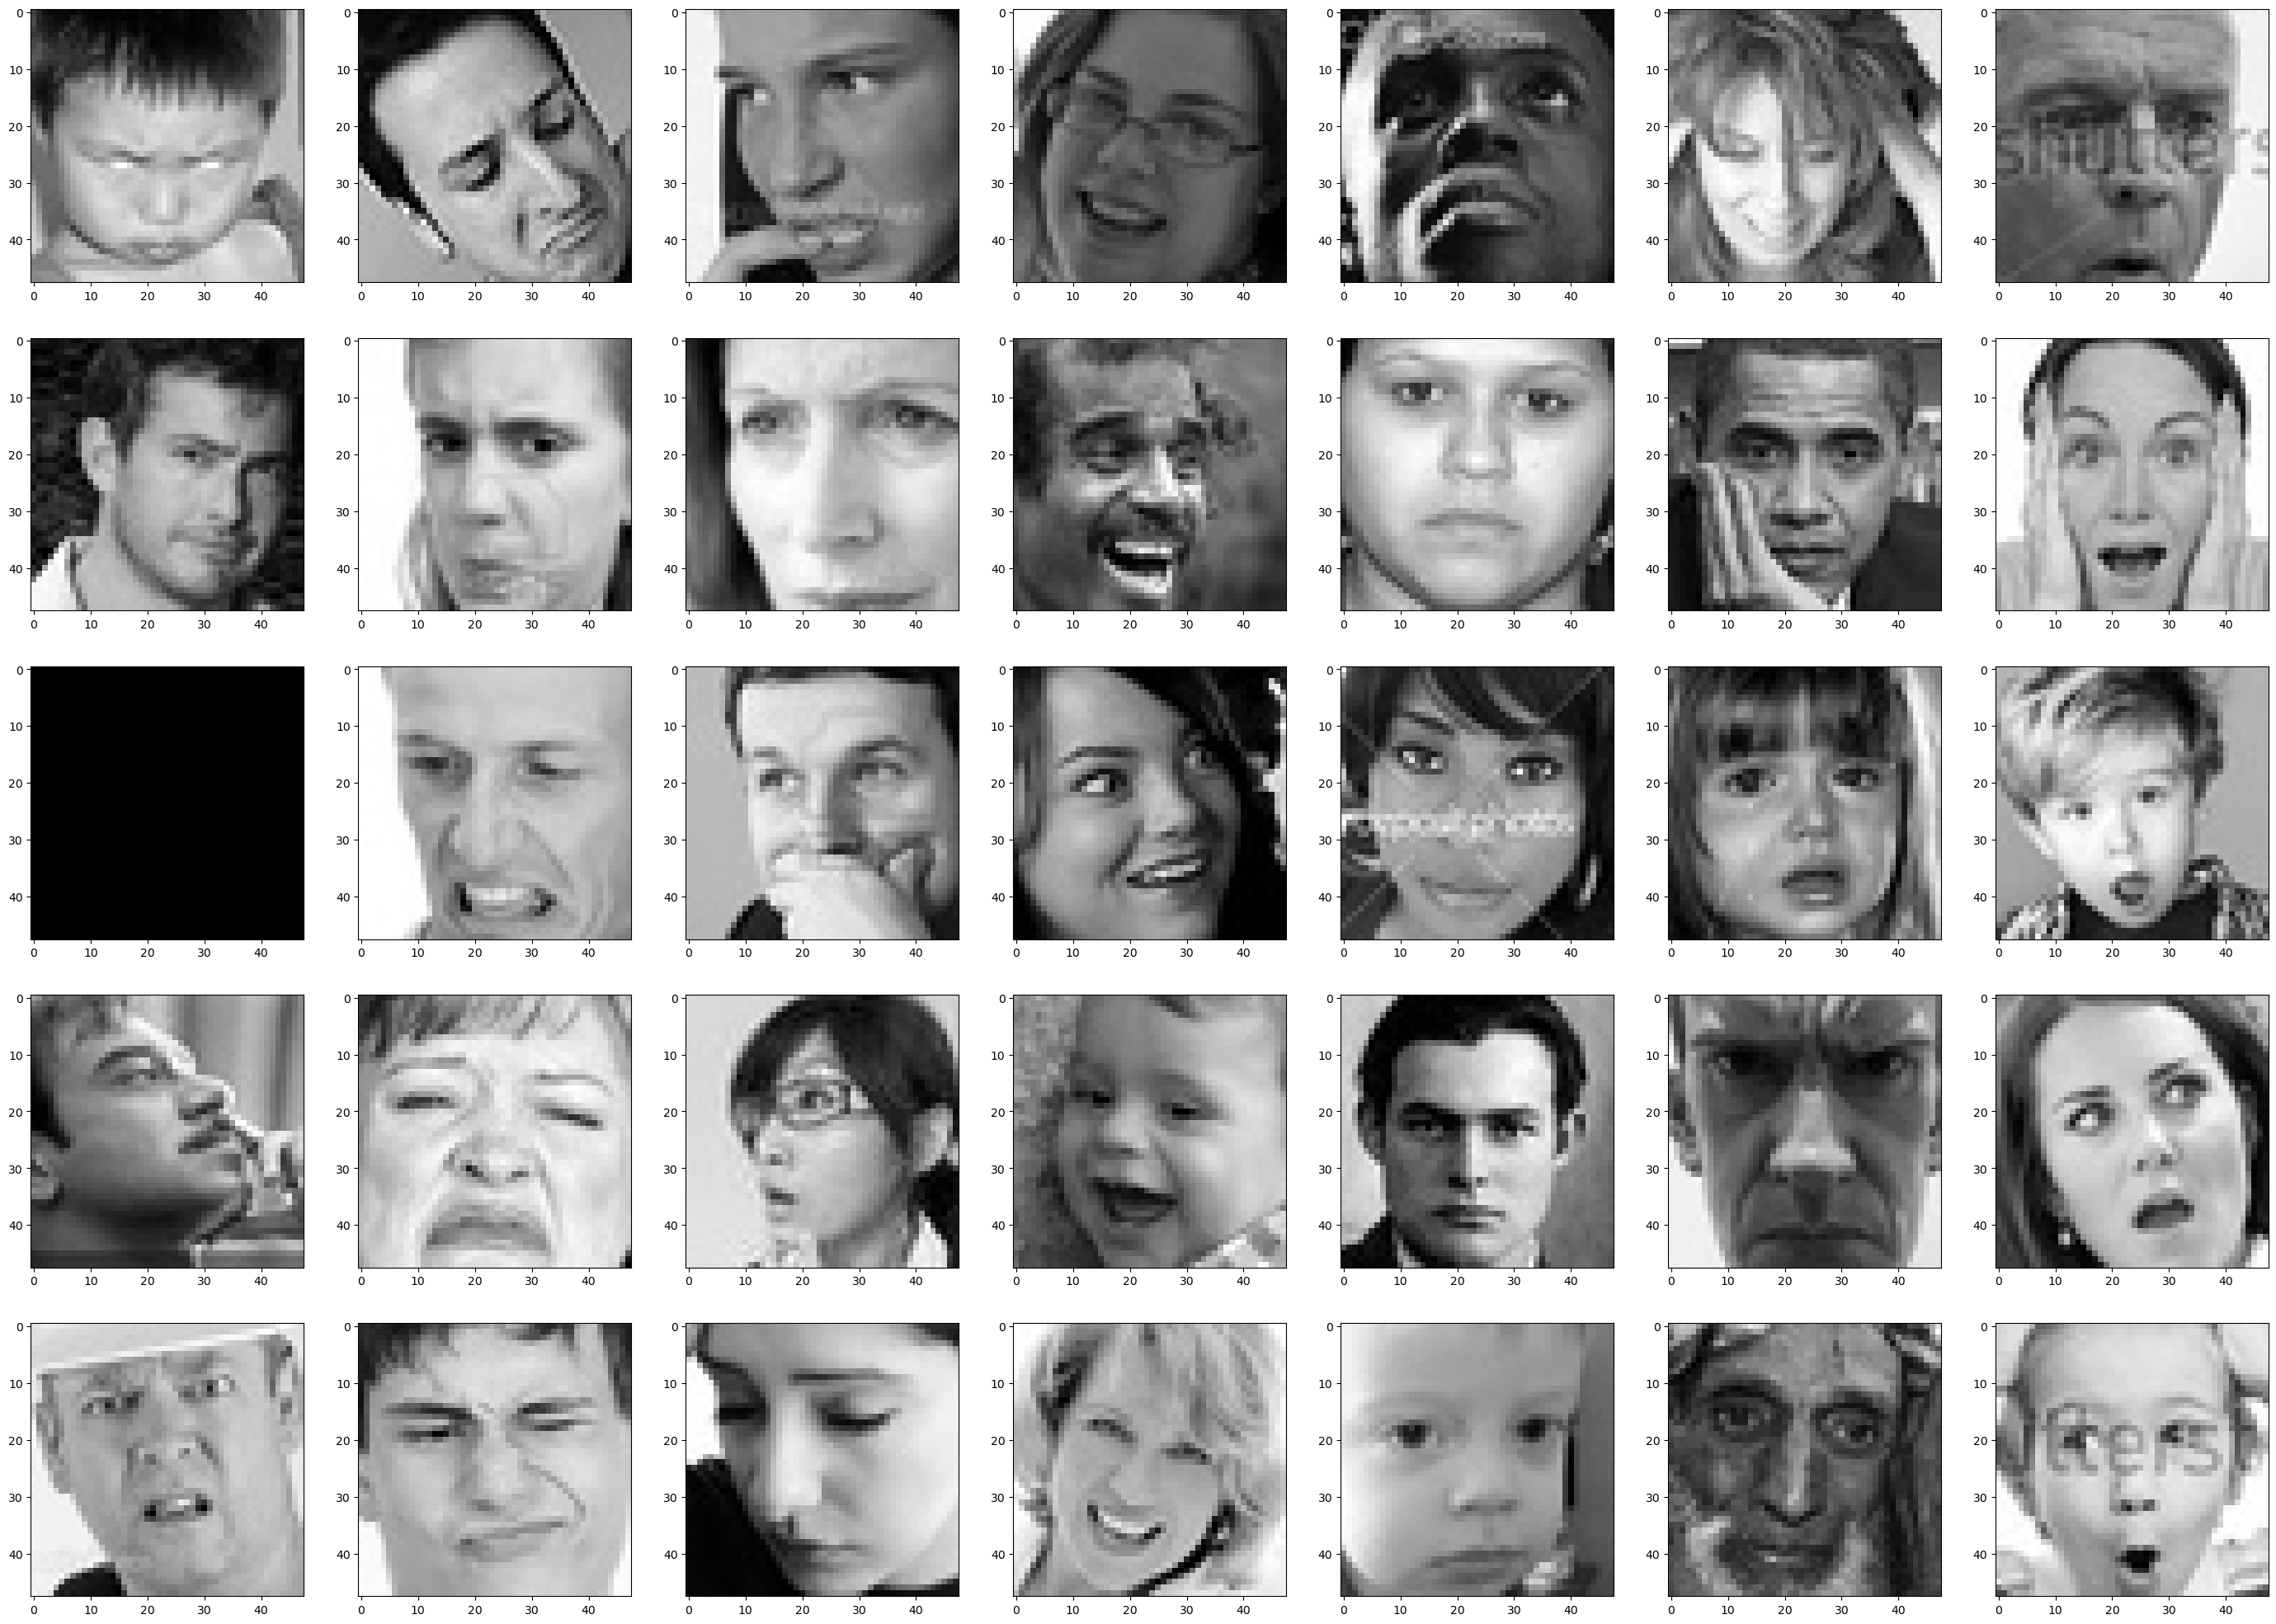

In [3]:
# Data Visualization
from skimage.io import imread
train_dir = 'D:/Download/FER 2013/train/'
test_dir  = 'D:/Download/FER 2013/test/'
total_labels = len(os.listdir(train_dir))
fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
for x in range(5):
    for y,v in zip(range(total_labels),os.listdir(train_dir)):
        ax[x][y].imshow(imread(train_dir+v+'/'+os.listdir(train_dir+v)[x]), cmap='gray')

plt.show()

In [4]:
print("Train Set :")
train_count = []
for folder in os.listdir(train_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(train_dir+folder)), "image")
    train_count.append(len(os.listdir(train_dir+folder)))    
print()
test_count = []
print("Test Set :")
for folder in os.listdir(test_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(test_dir+folder)), "images")
    test_count.append(len(os.listdir(test_dir+folder)))

Train Set :
angry folder contains		 3995 image
disgust folder contains		 436 image
fear folder contains		 4097 image
happy folder contains		 7215 image
neutral folder contains		 4965 image
sad folder contains		 4830 image
surprise folder contains		 3171 image

Test Set :
angry folder contains		 951 images
disgust folder contains		 111 images
fear folder contains		 1024 images
happy folder contains		 1774 images
neutral folder contains		 1233 images
sad folder contains		 1247 images
surprise folder contains		 831 images


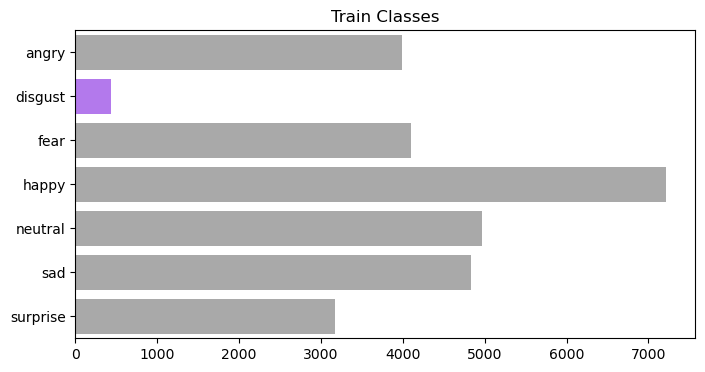

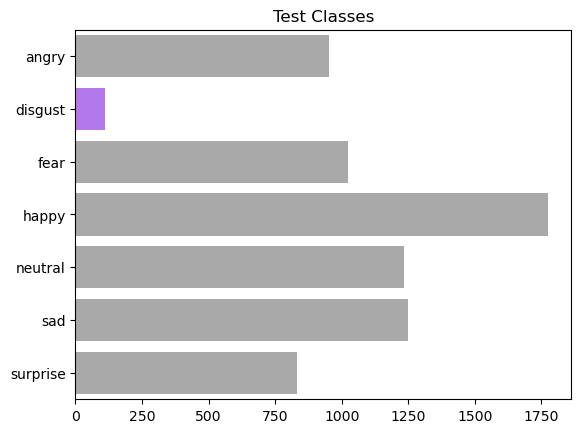

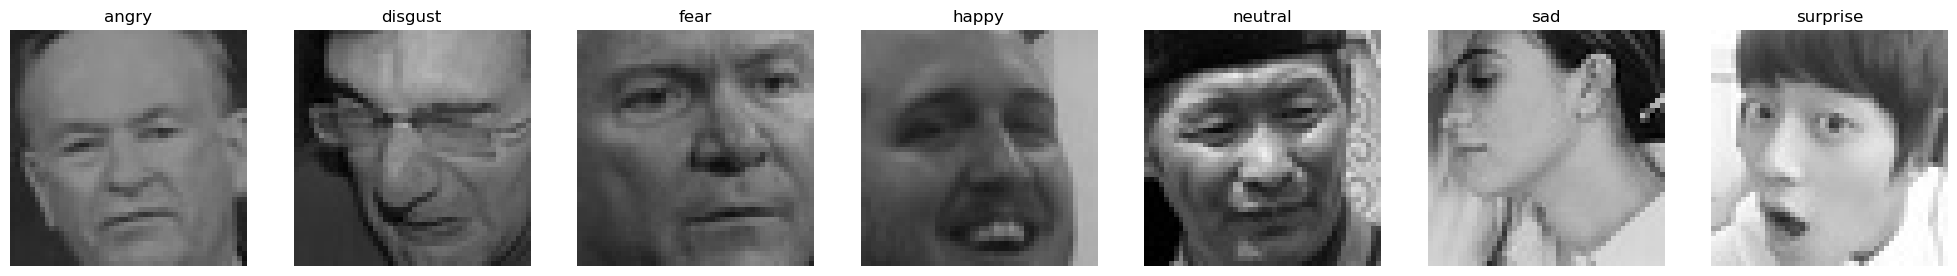

In [5]:
palette = {c: dim_colour if c not in vals else main_accent_colour for c in os.listdir(train_dir)}
plt.figure(figsize=(8,4))
ax = sns.barplot(y=os.listdir(train_dir),x=train_count,palette=palette).set(title='Train Classes')
plt.show()
print()
ax = sns.barplot(y=os.listdir(test_dir),x=test_count,palette=palette).set(title='Test Classes')
plt.show()
print()
plt.figure(figsize=(25,25))
i = 1
for folder in os.listdir(train_dir):   
    img = load_img((train_dir + folder +'/'+ os.listdir(train_dir + folder)[6]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')
    i += 1    
plt.show()

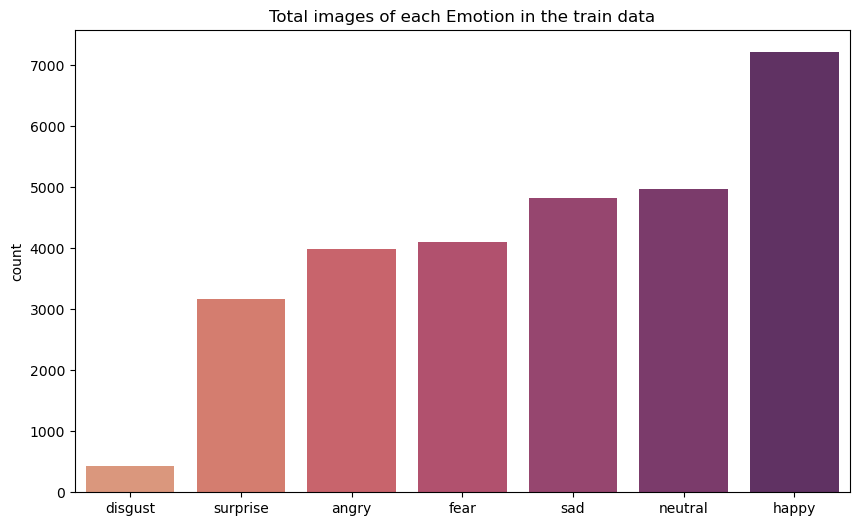

In [6]:
df = {}
for i in os.listdir(train_dir):
    directory = train_dir + i
    df[i] = len(os.listdir(directory))
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total")
plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y="total", palette="flare", data=df)
plt.ylabel("count")
plt.title("Total images of each Emotion in the train data")
plt.show()

**Image Preprocessing**

In [7]:
IMAGE_SIZE=48
BATCH_SIZE=64
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

train_datagen = train_datagen.flow_from_directory(train_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = test_datagen.flow_from_directory(test_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7171 images belonging to 7 classes.


In [8]:
os.listdir(train_dir)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [9]:
# training_set.class_indices

**Model**

In [10]:
from tensorflow.keras import layers, models
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.BatchNormalization(),
    layers.Dropout(0.40),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

end=cnn.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10
449/449 [==============================] - 272s 600ms/step - loss: 1.8598 - accuracy: 0.3040 - val_loss: 1.8191 - val_accuracy: 0.2804
Epoch 2/10
449/449 [==============================] - 95s 211ms/step - loss: 1.5902 - accuracy: 0.3800 - val_loss: 1.4790 - val_accuracy: 0.4273
Epoch 3/10
449/449 [==============================] - 146s 324ms/step - loss: 1.5147 - accuracy: 0.4145 - val_loss: 1.4473 - val_accuracy: 0.4405
Epoch 4/10
449/449 [==============================] - 102s 226ms/step - loss: 1.4621 - accuracy: 0.4353 - val_loss: 1.4503 - val_accuracy: 0.4393
Epoch 5/10
449/449 [==============================] - 207s 460ms/step - loss: 1.4256 - accuracy: 0.4513 - val_loss: 1.4042 - val_accuracy: 0.4599
Epoch 6/10
449/449 [==============================] - 182s 405ms/step - loss: 1.4032 - accuracy: 0.4634 - val_loss: 1.3573 - val_accuracy: 0.4805
Epoch 7/10
449/449 [==============================] - 223s 496ms/step - loss: 1.3832 - accuracy: 0.4680 - val_loss: 1.4460 - 

**Saving File**

In [11]:
cnn.save("ML_Facial_recognition_model.h5")

**Evaluation of Model**

In [12]:
# Evaluate the model
test_loss, test_acc = cnn.evaluate(test_datagen)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

113/113 [==============================] - 13s 115ms/step - loss: 1.2720 - accuracy: 0.5073
validation accuracy : 50.732117891311646%
validation loss : 1.2720458507537842


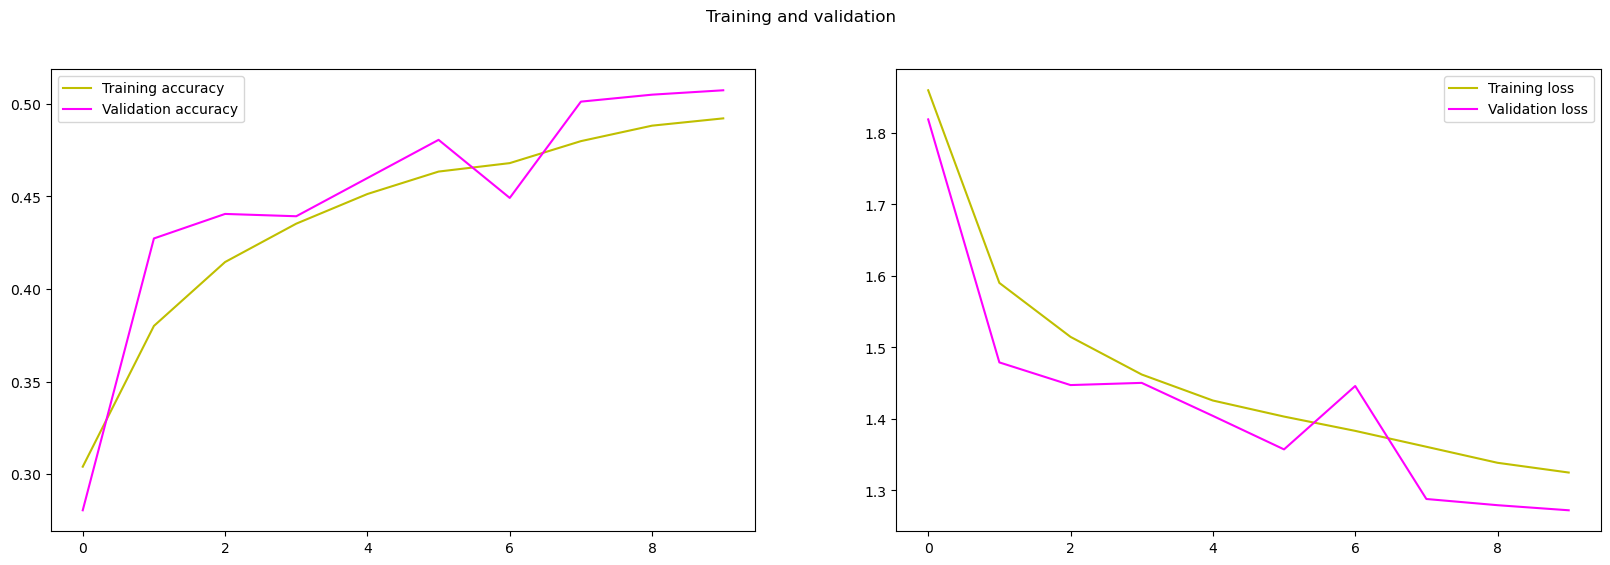

In [13]:
acc = end.history['accuracy']
val_acc = end.history['val_accuracy']
loss = end.history['loss']
val_loss = end.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'magenta', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'magenta', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

113/113 [==============================] - 16s 129ms/step
              precision    recall  f1-score   support

       angry       0.12      0.13      0.12       951
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.09      0.11      1024
       happy       0.25      0.28      0.26      1774
     neutral       0.17      0.26      0.21      1233
         sad       0.20      0.09      0.13      1247
    surprise       0.10      0.13      0.11       831

    accuracy                           0.18      7171
   macro avg       0.14      0.14      0.13      7171
weighted avg       0.17      0.18      0.17      7171





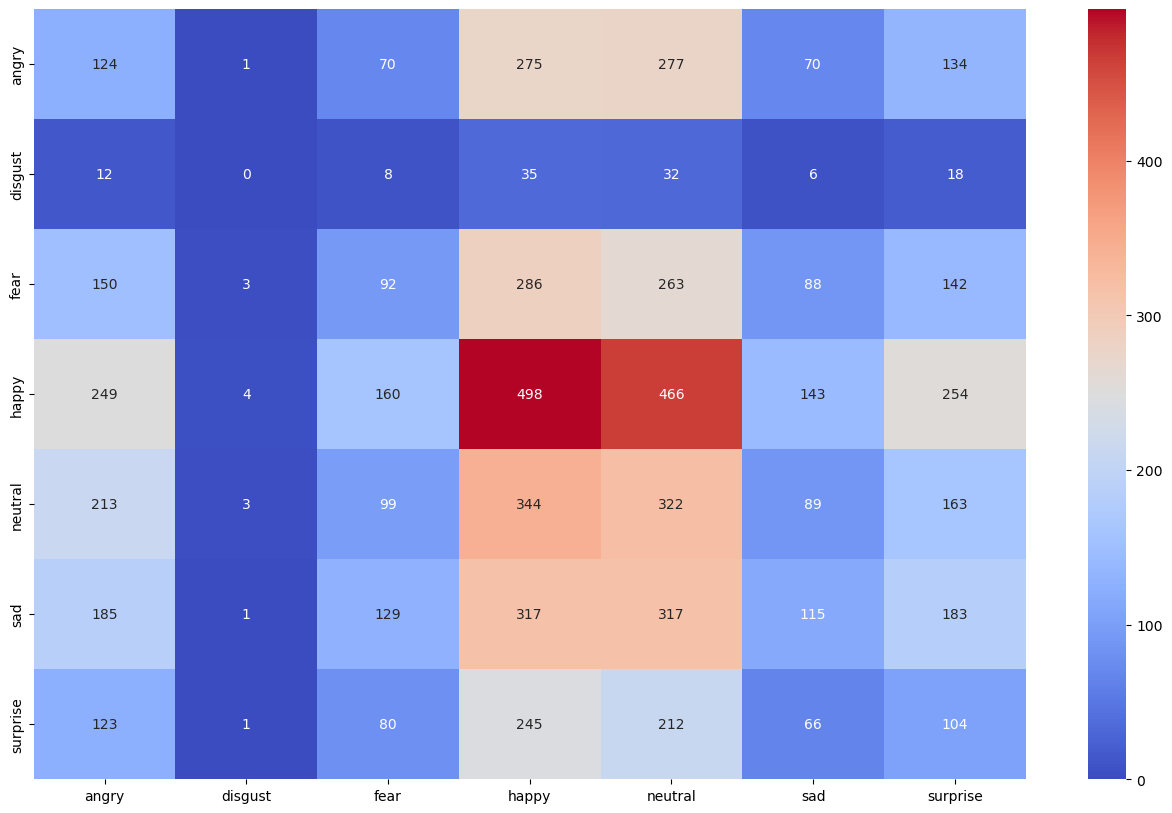

In [14]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(cnn.predict(test_datagen), axis=-1)
print(classification_report(test_datagen.classes, y_pred, target_names=test_datagen.class_indices.keys()), end='\n\n\n')

cm = confusion_matrix(test_datagen.classes, y_pred)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.coolwarm, annot=True, fmt='.0f', xticklabels=test_datagen.class_indices.keys(), yticklabels=test_datagen.class_indices.keys())
plt.show()

**Recommending Music**

In [15]:
mood_music = pd.read_csv("Songs_For_diffrent_moods.csv")
mood_music = mood_music[['name','artist','mood']]
mood_music.head()

,name,artist,mood
0,1999,Prince,Happy
1,23,Blonde Redhead,Sad
2,9 Crimes,Damien Rice,Sad
3,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic


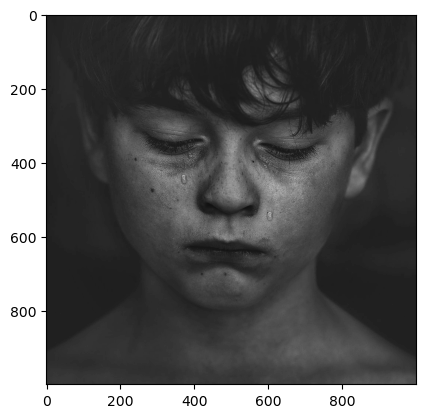

In [16]:
image = cv2.imread('sadd.jfif',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.show()

In [17]:
image = cv2.resize(image,(48,48))
img=np.array(image)
img=img.reshape(1,48,48,1)
predict_x=cnn.predict(img) 
result=np.argmax(predict_x,axis=1)
result[0]

1/1 [==============================] - 1s 899ms/step


6

In [18]:
# training_set.class_indices

In [19]:
if(result[0]==0 or result[0]==1 or result[0]==2 ):
    #for angery,disgust,fear
    filter1=mood_music['mood']=='Calm'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==3 or result[0]==4):
    #for happy, neutral
    filter1=mood_music['mood']=='Happy'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==5):
       #for Sad
    filter1=mood_music['mood']=='Sad'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==6):
     #for surprise
    filter1=mood_music['mood']=='Energetic'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)

,index,name,artist,mood
0,568,There For You,Gorgon City,Energetic
1,239,Holy Water,Galantis,Energetic
2,257,I'm Not Okay (I Promise),My Chemical Romance,Energetic
3,237,Holding On,Scary Kids Scaring Kids,Energetic
4,213,Go With The Flow,Queens of the Stone Age,Energetic
